In [7]:
 !wget --save-cookies cookies.txt --keep-session-cookies --no-check-certificate "https://docs.google.com/uc?export=download&id=1AAWfvdHrH-GsrO5UFAVvGPBSWNB22R4l" -O- | sed -rn "s/.*confirm=([0-9A-Za-z_]+).*/Code: \1\n/p"

--2019-12-14 14:59:16--  https://docs.google.com/uc?export=download&id=1AAWfvdHrH-GsrO5UFAVvGPBSWNB22R4l
Resolving docs.google.com (docs.google.com)... 64.233.189.102, 64.233.189.101, 64.233.189.139, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.17K  --.-KB/s    in 0s      

2019-12-14 14:59:16 (56.5 MB/s) - written to stdout [3246]

Code: 1w80


In [8]:
#in the below URl put the code from the output of the cell above 'Code :####'

!wget --load-cookies cookies.txt "https://docs.google.com/uc?export=download&confirm=1w80&id=1AAWfvdHrH-GsrO5UFAVvGPBSWNB22R4l" -O /tmp/dataset.zip

import os
import zipfile

local_zip = '/tmp/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2019-12-14 14:59:32--  https://docs.google.com/uc?export=download&confirm=1w80&id=1AAWfvdHrH-GsrO5UFAVvGPBSWNB22R4l
Resolving docs.google.com (docs.google.com)... 64.233.189.100, 64.233.189.113, 64.233.189.139, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5ioc6pkigisi1cnkmpgaivs7lohguptt/1576332000000/13986308290690852571/*/1AAWfvdHrH-GsrO5UFAVvGPBSWNB22R4l?e=download [following]
--2019-12-14 14:59:32--  https://doc-0g-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5ioc6pkigisi1cnkmpgaivs7lohguptt/1576332000000/13986308290690852571/*/1AAWfvdHrH-GsrO5UFAVvGPBSWNB22R4l?e=download
Resolving doc-0g-94-docs.googleusercontent.com (doc-0g-94-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-0g-94-docs.googleusercontent.com

Using TensorFlow backend.


total sample directory : 3
(128, 128)
(128, 128)
(46, 29, 3)
(128, 128)
(900, 1200, 3)
(128, 128)
(128, 128)
(128, 128)
(900, 1200, 3)


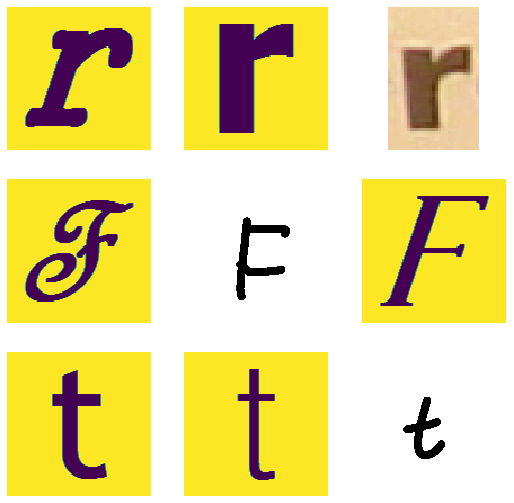

Size of one random image : (900, 1200, 3)
 Example image : 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 ...
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from random import randint
import sys
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base_dir = "/tmp/dataset"

train = os.path.join(base_dir,"train")

test  = os.path.join(base_dir,"test")


def showFolderImageSample(base_folder, img_number=2):
    '''
    base_folder(String) : directory in which we'll look for sample
    img_number : for each folder how many img to show
    '''
    nrows = ncols = img_number

    fig = plt.gcf()
    fig.set_size_inches(ncols * img_number, nrows * img_number)
    dir_names = os.listdir(base_folder)

    # get sample directory
    sample_dir = []
    for i in range(img_number):
        sample_dir.append(dir_names[randint(0,len(dir_names)-1)])
    dir_names = [os.path.join(base_folder, dname) for dname in sample_dir]

    print("total sample directory : {}".format(len(dir_names)))
    # for each sample directory get img_number random image

    img = []
    for d in dir_names:
        for i in range(img_number):
            img.append(os.path.join(d, os.listdir(
                d)[randint(0, len(os.listdir(d)) - 1)]))

    for i, img_path in enumerate(img):
        # Set up subplot; subplot indices start at 1
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off')  # Don't show axes (or gridlines)
        img = mpimg.imread(img_path)
        print(img.shape)
        plt.imshow(img)

    plt.show()
    print("Size of one random image : {}".format(img.shape))
    print(" Example image : \n {}".format(img[0]))

########################################################################


def dirTotalFile(base):
    fileNumber = 0
    if(os.path.isfile(base)):
        return 0
    _dir = os.listdir(base)
    for d in _dir:
        _d = os.path.join(base, d)
        if(os.path.isdir(_d)):
            fileNumber += dirTotalFile(_d)
        else:
            fileNumber += 1
    return fileNumber


########################################################################

showFolderImageSample(train,img_number=3)


In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical"
)


Found 49448 images belonging to 62 classes.
Found 12325 images belonging to 62 classes.
Found 12334 images belonging to 62 classes.


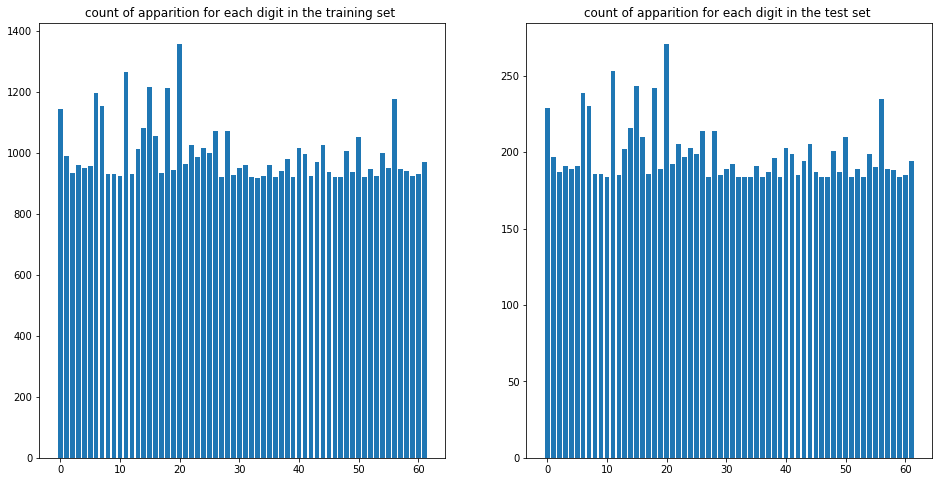

1358


In [12]:
#bias exploration

train_counts=[]
test_counts=[]

list_dir = (len(os.listdir(train)))
train_list_dir = [os.path.join(train,f) for f in os.listdir(train)]
test_list_dir = [os.path.join(test,f) for f in os.listdir(test)]

_max = 0

for i in range(list_dir):
    train_counts.append(len(os.listdir(train_list_dir[i])))
    test_counts.append(len(os.listdir(test_list_dir[i])))

_max = max(train_counts)


plt.rcParams['figure.figsize'] = (16,8) # Make the figures a bit bigger

fig,(ax1,ax2,) = plt.subplots(1,2)

x = range(0,62)
ax1.bar(x,train_counts)
ax1.set_title("count of apparition for each digit in the training set ")


ax2.bar(x,test_counts)
ax2.set_title("count of apparition for each digit in the test set ")



plt.show()

print(_max)


In [13]:
from keras import optimizers

optimizer = "rmsprop"

network = models.Sequential()
network.add(layers.Conv2D(16,3,activation='relu',input_shape=(128,128,3)))
network.add(layers.MaxPooling2D(2))
network.add(layers.Conv2D(16,3,activation="relu", input_shape=(128,128,3)))
network.add(layers.MaxPooling2D(2))

network.add(layers.Conv2D(32,3,activation="relu", input_shape=(128,128,3)))
network.add(layers.Conv2D(32,3,activation="relu", input_shape=(128,128,3)))

network.add(layers.Conv2D(64,3,activation="relu", input_shape=(128,128,3)))
network.add(layers.Conv2D(64,3,activation="relu", input_shape=(128,128,3)))
network.add(layers.MaxPooling2D(2))


network.add(layers.Flatten())
network.add(layers.Dense(62, activation='softmax'))

network.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)   



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





100/100 [==============================] - 12s 122ms/step - loss: 2.6509 - acc: 0.3822 - val_loss: 0.9554 - val_acc: 0.7281
Epoch 2/50
100/100 [==============================] - 5s 52ms/step - loss: 1.5103 - acc: 0.6262 - val_loss: 0.8352 - val_acc: 0.7656
Epoch 3/50
100/100 [==============================] - 5s 54ms/step - loss: 1.2870 - acc: 0.6819 - val_loss: 0.7750 - val_acc: 0.7594
Epoch 4/50
100/100 [==============================] - 5s 50ms/step - loss: 1.1393 - acc: 0.7044 - val_loss: 0.7133 - val_acc: 0.7781
Epoch 5/50
100/100 [==============================] - 5s 55ms/step - loss: 1.0412 - acc: 0.7362 - val_loss: 0.6819 - val_acc: 0.8063
Epoch 6/50
100/100 [==============================] - 5s 49ms/step - loss: 0.9973 - acc: 0.7319 - val_loss: 0.5653 - val_acc: 0.8094
Epoch 7/50
100/100 [==============================] - 5s 52ms/step - loss: 0.9352 - acc: 0.7444 

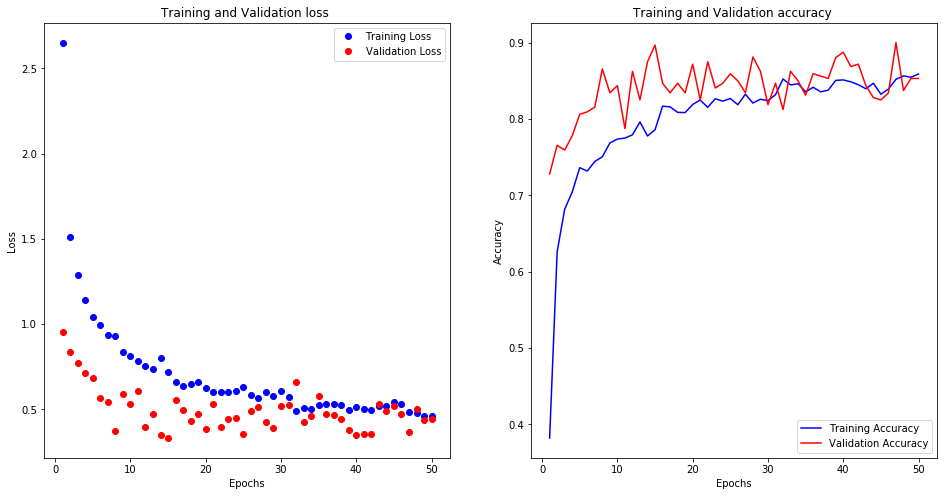

In [14]:

epochs = 50

network.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['acc'])


history = network.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=epochs,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=10
)


history_dict = history.history 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.rcParams['figure.figsize'] = (16,8) # Make the figures a bit bigger
fig,(ax1,ax2,) = plt.subplots(1,2)

x = range(1,epochs+1)
ax1.plot(x,loss_values,'bo',label='Training Loss')
ax1.plot(x,val_loss_values,'ro',label='Validation Loss')
ax1.set_title('Training and Validation loss ')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()


ax2.plot(x,acc_values,'b',label='Training Accuracy')
ax2.plot(x,val_acc_values,'r',label='Validation Accuracy')
ax2.set_title('Training and Validation accuracy ')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()


In [15]:
test_loss, test_acc = network.evaluate_generator(test_generator,verbose=1,steps=100)
print('accuracy on test set : {}'.format(test_acc))

network.save('./chars74k_model.h5')

100/100 [==============================] - 4s 38ms/step
accuracy on test set : 0.83125
